# Numeric Data recognition using LeNet-5 Architecture

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                               
from keras.datasets import mnist

#### Load data from librerey 

In [125]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# image and classes

In [126]:
x_train.shape

(60000, 28, 28)

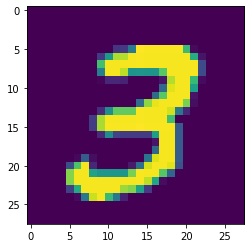

In [127]:
plt.imshow(x_train[7])

In [128]:
y_train[7]

3

# Data preprocessing

In [ ]:
from tensorflow.keras.utils import to_categorical

In [130]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [133]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [134]:
x_train = x_train/255

x_test = x_test/255

In [135]:
y_cat_train = to_categorical(y_train)

y_cat_test = to_categorical(y_test)

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten,MaxPooling2D

In [137]:
y_cat_train.shape

(60000, 10)

In [138]:
x_test.shape

(10000, 28, 28)

In [139]:
x_train = x_train.reshape(60000, 28, 28,1)

In [140]:
x_test = x_test.reshape(10000, 28, 28,1)

In [141]:
x_train.shape

(60000, 28, 28, 1)

In [142]:
x_test.shape

(10000, 28, 28, 1)

In [242]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [143]:
input_shape = x_train.shape[1:]

In [144]:
input_shape 

(28, 28, 1)

# Model training

In [288]:
model = Sequential()
model.add(Conv2D(filters=35,kernel_size=(4,4),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=68,kernel_size=(4,4),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(500,activation='relu',kernel_regularizer=  tf.keras.regularizers.L2(0.1)))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [289]:
from tensorflow.keras.callbacks import EarlyStopping

In [290]:
stop = EarlyStopping(patience=4)

In [291]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=15,callbacks=stop)

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 2.2633 - accuracy: 0.4428 - val_loss: 0.7258 - val_accuracy: 0.8262
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5594 - accuracy: 0.8846 - val_loss: 0.4340 - val_accuracy: 0.9151
Epoch 3/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4273 - accuracy: 0.9143 - val_loss: 0.3475 - val_accuracy: 0.9397
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3657 - accuracy: 0.9281 - val_loss: 0.3142 - val_accuracy: 0.9411
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3260 - accuracy: 0.9355 - val_loss: 0.2910 - val_accuracy: 0.9423
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3008 - accuracy: 0.9414 - val_loss: 0.2954 - val_accuracy: 0.9417
Epoch 7/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2865 - accuracy: 0.9449 - val_loss: 0.2710 -

In [292]:
loss = pd.DataFrame(model.history.history)

In [293]:
loss

,loss,accuracy,val_loss,val_accuracy
0,2.263328,0.442783,0.725789,0.8262
1,0.559450,0.884650,0.434001,0.9151
2,0.427294,0.914317,0.347493,0.9397
3,0.365729,0.928067,0.314246,0.9411
4,0.326034,0.935483,0.291035,0.9423
5,0.300791,0.941383,0.295375,0.9417
6,0.286510,0.944883,0.271002,0.9455
7,0.269724,0.947267,0.250654,0.9524
8,0.258713,0.949733,0.263114,0.9474
9,0.246123,0.952467,0.241155,0.9525


<AxesSubplot:>

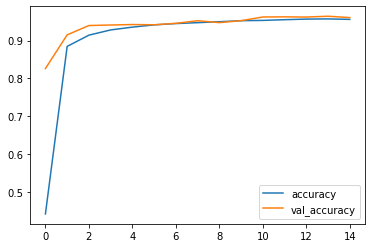

In [294]:
loss[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

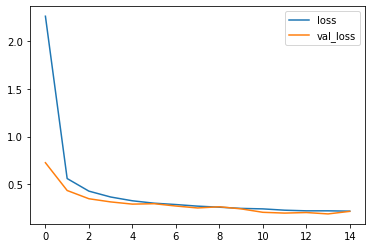

In [295]:
loss[['loss','val_loss']].plot()

In [296]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [260]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Single image recognition

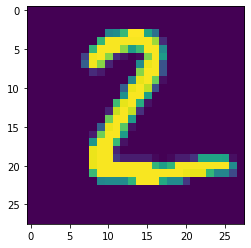

In [315]:
plt.imshow(x_test[1])

In [316]:
np.argmax(pred[1])

2

In [317]:
y_test[1]

2

##### using np.argmax making all prediction probablity into single value which is maximum

In [301]:
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [303]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Model Evaluating

In [304]:
confusion_matrix(y_test,prediction) 

array([[ 968,    0,    5,    0,    0,    0,    4,    1,    2,    0],
       [   0, 1121,    1,    6,    0,    1,    4,    2,    0,    0],
       [   2,    1, 1012,    7,    0,    1,    1,    7,    1,    0],
       [   0,    0,   12,  979,    0,   10,    0,    6,    3,    0],
       [   1,    3,    9,    4,  922,    2,    5,   11,    2,   23],
       [   3,    0,    1,   14,    0,  866,    8,    0,    0,    0],
       [   4,    4,    3,    0,    7,    3,  931,    0,    6,    0],
       [   2,    2,   29,   15,    0,    0,    0,  979,    0,    1],
       [   7,    0,   15,   14,    2,    9,   11,    7,  906,    3],
       [   7,    6,    1,   20,    3,   10,    0,   34,    5,  923]],
      dtype=int64)

<AxesSubplot:>

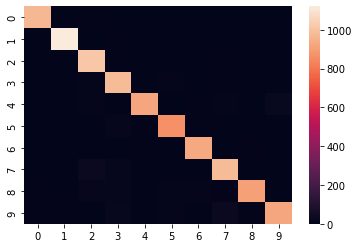

In [306]:
sns.heatmap(confusion_matrix(y_test,prediction) )

In [318]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.93      0.98      0.95      1032
           3       0.92      0.97      0.95      1010
           4       0.99      0.94      0.96       982
           5       0.96      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.94      0.95      0.94      1028
           8       0.98      0.93      0.95       974
           9       0.97      0.91      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [321]:
print('The accuracy is:',accuracy_score(y_test,prediction)*100)

The accuracy is: 96.07


# Any random image from testing data set

In [330]:
my_num = x_test[508]

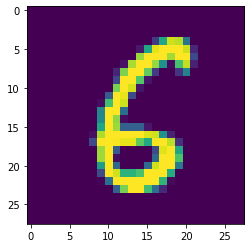

In [331]:
plt.imshow(my_num)

#### changing shape which is required for model

which is (1,28,28,1)


In [332]:
np.argmax(model.predict(my_num.reshape(1,28,28,1)))

1/1 [==============================] - 0s 20ms/step


6

In [333]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 25, 25, 35)        595       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 35)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 68)          38148     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 68)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1088)              0         
                                                                 
 dense_15 (Dense)            (None, 500)             

# Thank you